# **Segmentação de clientes**

![Texto alternativo](https://www.hubspot.com/hs-fs/hubfs/media/Segmentacaodeclientesoqueecomoexecutaremseunegocio.jpeg?width=610&height=406&name=Segmentacaodeclientesoqueecomoexecutaremseunegocio.jpeg)

### **Declaração do problema**

O proprietário de um shopping center, deseja entender as características demográficas, o comportamento de compra e as atitudes e preferências dos clientes que estão mais propensos a visitar o estabelecimento. Com esse conhecimento, poderá criar campanhas de marketing mais relevantes e personalizadas, melhorar a experiência dos clientes e aumentar as vendas.

----

### **Objetivo**

O objetivo do estudo é entender os clientes que estão mais propensos a visitar o shopping center, com base nas informações disponíveis na base de dados de clientes, para que a equipe de marketing possa direcionar suas campanhas de forma mais eficaz e melhorar a experiência dos clientes.

----

### Estudo: 

Importantando bibliotecas que vão ser utilizadas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator


Importando a base de dados:

In [2]:
dados = pd.read_csv("Mall_Customers.csv")

# Convertendo o Customer ID como indice
db = dados.set_index("CustomerID")

#### Exploração dos dados

In [3]:
## Checando a parte superior do dataframe
db.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


----
#### Legenda dos dados:  

CustomerID: ID exclusivo atribuído ao cliente

Gender: Gênero do cliente

Age: Idade do cliente

Annual Income (k$): Renda anual do cliente 

Spending Score (1-100): Pontuação atribuída pelo shopping com base no comportamento do cliente e na natureza dos gastos

----

In [4]:
## Checando os tipos de dados do dataframe
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
## Obter o resumo estatístico dos dados
db.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
## Verificando dados nulos
print(db.isna().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


----
## Visualização dos dados


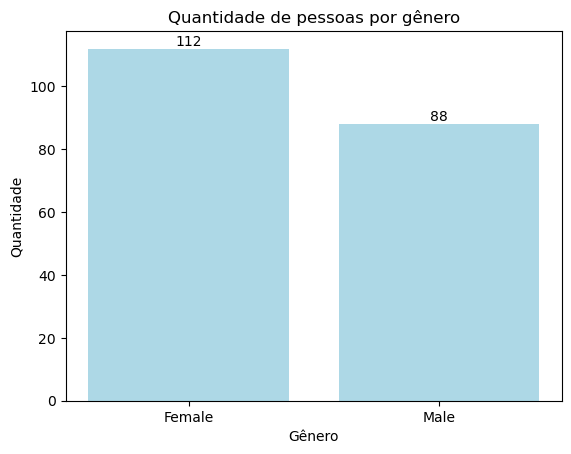

In [7]:
# Quantidade de pessoas em cada gênero 
gender = db["Gender"].value_counts()

# Gráfico de barras
plt.bar(gender.index,gender.values, color=["lightblue"])
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.title("Quantidade de pessoas por gênero")

for index, value in enumerate(gender.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

#### Com base nas informações fornecidas, podemos notar que o público do shopping é 62% feminino e 38% masculino. Isso significa que as mulheres são a maioria dos clientes do shopping.
------

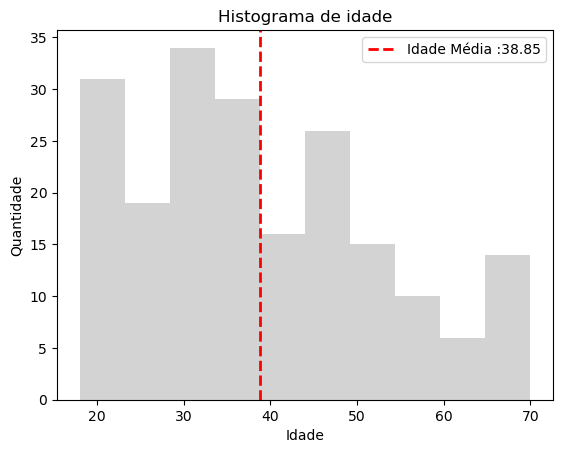

In [8]:
# Histograma da distribuição da idade dos clientes e idade média.

avg_cliente = db["Age"].mean()

plt.hist(db["Age"],bins=10,color = 'lightgray')
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Histograma de idade")
plt.axvline(avg_cliente, color='red', linestyle='dashed', linewidth=2, label='Idade Média :' + str(avg_cliente))
plt.legend()

plt.show()

#### A idade média dos clientes do shopping é de 38,85 anos. Isso significa que a maioria dos clientes do shopping tem entre 35 e 45 anos.

-----

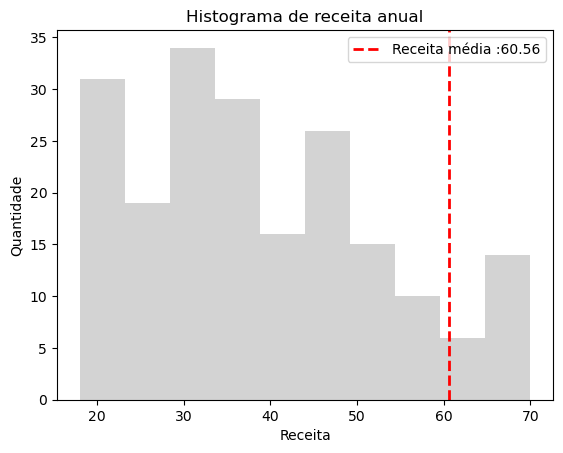

In [9]:
# Distribuição da Receita Anual


avg_receita = db["Annual Income (k$)"].mean()

plt.hist(db["Age"],bins=10,color = 'lightgrey')
plt.xlabel("Receita")
plt.ylabel("Quantidade")
plt.title("Histograma de receita anual")
plt.axvline(avg_receita, color='red', linestyle='dashed', linewidth=2, label='Receita média :' + str(avg_receita))
plt.legend()

plt.show()


#### A receita anual média dos clientes do shopping é de 60 mil reais. Isso significa que a maioria dos clientes do shopping ganha cerca de 5 mil reais por mês.

-------

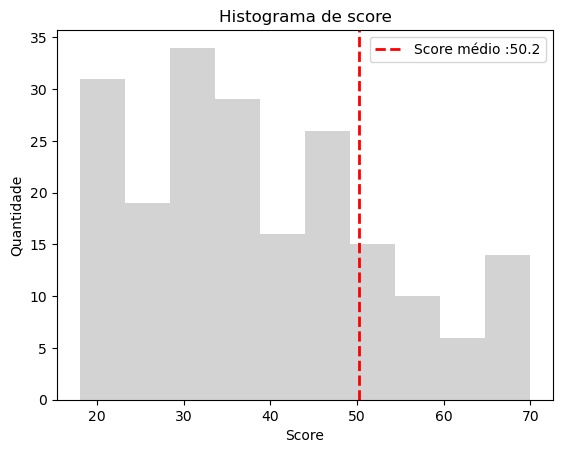

In [10]:
# Distribuição do Score

avg_score = db["Spending Score (1-100)"].mean()

plt.hist(db["Age"],bins=10,color='lightgrey')
plt.xlabel("Score")
plt.ylabel("Quantidade")
plt.title("Histograma de score")
plt.axvline(avg_score, color='red', linestyle='dashed', linewidth=2, label='Score médio :' + str(avg_score))
plt.legend()

plt.show()


#### A pontuação média dos clientes do shopping é de 50.2 pontos, isso significa que os clientes do shopping center estão, em geral, satisfeitos com o shopping center. No entanto, há alguns pontos que podem ser melhorados para aumentar a satisfação do cliente.

------

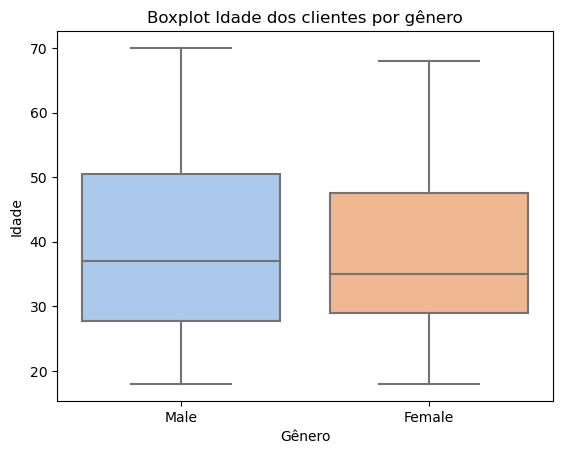

        count       mean        std   min    25%   50%   75%   max
Gender                                                            
Female  112.0  38.098214  12.644095  18.0  29.00  35.0  47.5  68.0
Male     88.0  39.806818  15.514812  18.0  27.75  37.0  50.5  70.0


In [11]:
fig, ax = plt.subplots()
sns.boxplot(x=db['Gender'], y=db['Age'], palette='pastel')

plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.title('Boxplot Idade dos clientes por gênero')

mean_age_male = db[db['Gender'] == 'Male']['Age'].mean()
mean_age_female = db[db['Gender'] == 'Female']['Age'].mean()


plt.show()

describe_idade = db.groupby("Gender")["Age"].describe()
print(describe_idade)



#### As idades entre homens e mulheres são bem semelhantes. A diferença média é de apenas 1,71 anos. Isso significa que, em média, as mulheres são um pouco mais jovens do que os homens.

-----

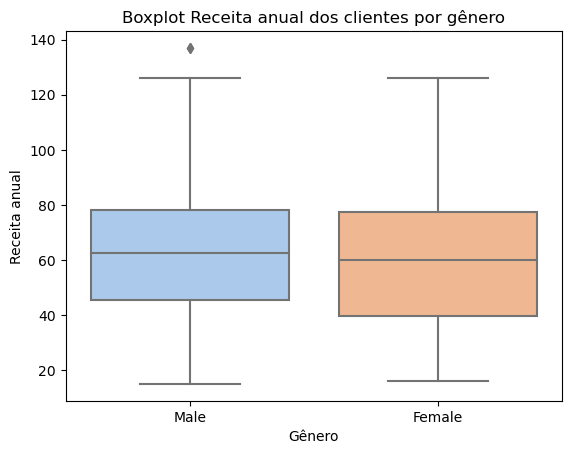

        count       mean        std   min    25%   50%    75%    max
Gender                                                              
Female  112.0  59.250000  26.011952  16.0  39.75  60.0  77.25  126.0
Male     88.0  62.227273  26.638373  15.0  45.50  62.5  78.00  137.0


In [12]:
fig, ax = plt.subplots()
sns.boxplot(x=db['Gender'], y=db["Annual Income (k$)"], palette='pastel')

plt.xlabel('Gênero')
plt.ylabel('Receita anual')
plt.title('Boxplot Receita anual dos clientes por gênero')

plt.show()

describe_receita = db.groupby("Gender")["Annual Income (k$)"].describe()
print(describe_receita)


#### A renda anual média dos homens é ligeiramente superior à das mulheres, o que pode indicar que os homens têm mais dinheiro para gastar. 

-------

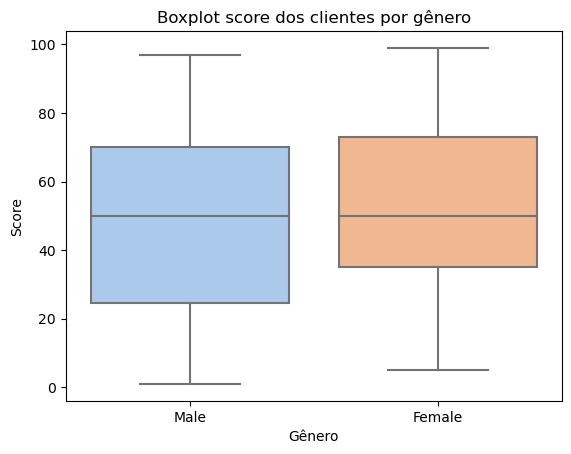

        count       mean        std   min    25%   50%    75%    max
Gender                                                              
Female  112.0  59.250000  26.011952  16.0  39.75  60.0  77.25  126.0
Male     88.0  62.227273  26.638373  15.0  45.50  62.5  78.00  137.0


In [13]:
fig, ax = plt.subplots()
sns.boxplot(x=db['Gender'], y=db["Spending Score (1-100)"], palette='pastel')

plt.xlabel('Gênero')
plt.ylabel('Score')
plt.title('Boxplot score dos clientes por gênero')

plt.show()

describe_score = db.groupby("Gender")["Spending Score (1-100)"].describe()
print(describe_receita)


#### A pontuação média das mulheres é ligeiramente superior à dos homens, o que pode indicar que as mulheres gastam mais dinheiro no shopping center.

------

### Removendo a variável categórica 

In [14]:
# selecionando apenas as variáveis numéricas
db2 = db[["Age","Annual Income (k$)","Spending Score (1-100)"]]
db2.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


### Verificando se há correlação entre as variáveis

In [15]:
db2.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


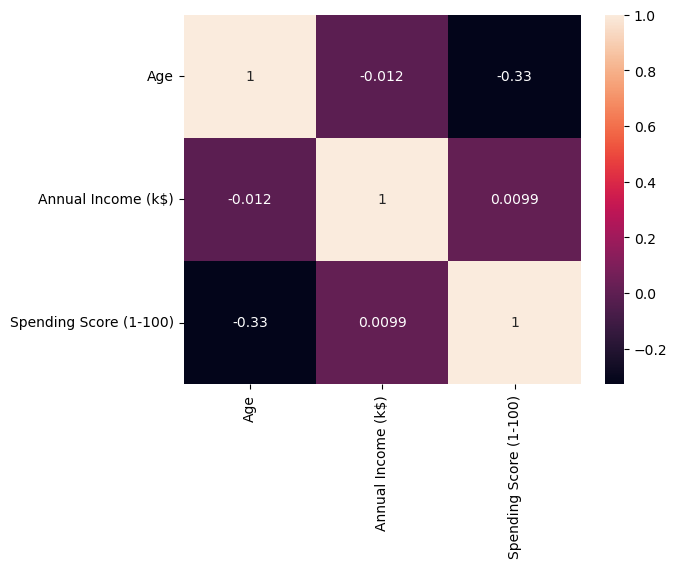

In [16]:
# Visualizando a correlação
sns.heatmap(db2.corr(),annot=True)
plt.show()

#### **Correlação** 

   - **Idade x Receita anual**: A correlação entre essa variáveis é próxima de zero (-0.012398), o que indica uma correlação muito fraca entre essas duas variáveis. Isso sugere que a idade das pessoas não está fortemente relacionada com a renda anual delas.
    
   - **Idade x Score**: A correlação entre essa variáveis é -0.327227, o que indica uma correlação negativa moderada. Isso significa que, em geral, à medida que a idade aumenta, o score de gastos tende a diminuir. No entanto, a correlação não é muito forte, o que significa que existem exceções.
    
   - **Receita anual x Score**: A correlação essa variáveis é próxima de zero (0.009903), indicando uma correlação muito fraca. Isso sugere que a renda anual das pessoas não está fortemente relacionada com seus scores de gastos.
    
Em resumo, com base nos coeficientes de correlação, não parece haver correlações fortes entre essas variáveis. No entanto, é importante observar que a correlação não captura todos os tipos de relacionamentos entre variáveis, e outras análises podem ser necessárias para entender completamente os dados.

---------
    

### Visualizando a relação entre as variáveis

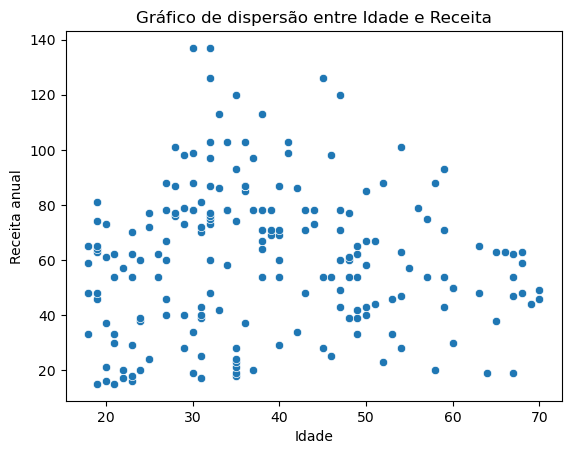

In [17]:
#Grafico de dispersão entre Idade e Receita Anual

sns.scatterplot(x=db2["Age"],y=db2["Annual Income (k$)"])
plt.xlabel('Idade')
plt.ylabel('Receita anual')
plt.title('Gráfico de dispersão entre Idade e Receita')


plt.show()

#### Como vimos acima, a idade das pessoas não está relacionada com a renda anual delas.
-----

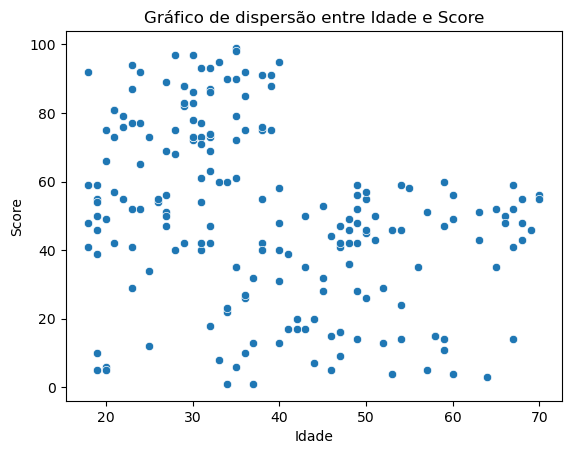

In [18]:
#Grafico de dispersão entre Idade e Score

sns.scatterplot(x=db2["Age"],y=db2["Spending Score (1-100)"])
plt.xlabel('Idade')
plt.ylabel('Score')
plt.title('Gráfico de dispersão entre Idade e Score')


plt.show()


####  À medida que a idade aumenta, o score de gastos tende a diminuir. No entanto, a correlação não é muito forte.

----

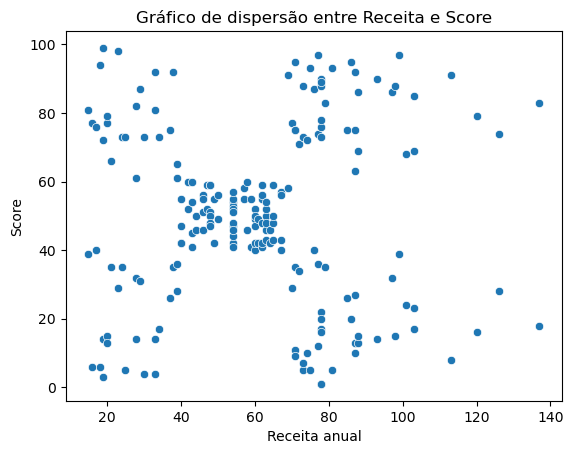

In [19]:
#Grafico de dispersão entre receita e Score

sns.scatterplot(x=db2["Annual Income (k$)"],y=db2["Spending Score (1-100)"])
plt.xlabel('Receita anual')
plt.ylabel('Score')
plt.title('Gráfico de dispersão entre Receita e Score')


plt.show()


#### A renda anual das pessoas não está relacionada com seus scores de gastos

-----

# **Clusterização**

A clusterização é uma técnica de análise de dados amplamente utilizada em ciência de dados e aprendizado de máquina. Ela envolve agrupar objetos ou pontos de dados semelhantes em conjuntos distintos, chamados de clusters.

### Normalização dos dados

A normalização de dados é uma etapa crítica na clusterização, ajudando a evitar distorções e garantindo que a análise seja robusta e confiável.

In [20]:
# Normalizando os dados
db2_scale = pd.DataFrame(scale(db2))
print(db2_scale)

            0         1         2
0   -1.424569 -1.738999 -0.434801
1   -1.281035 -1.738999  1.195704
2   -1.352802 -1.700830 -1.715913
3   -1.137502 -1.700830  1.040418
4   -0.563369 -1.662660 -0.395980
..        ...       ...       ...
195 -0.276302  2.268791  1.118061
196  0.441365  2.497807 -0.861839
197 -0.491602  2.497807  0.923953
198 -0.491602  2.917671 -1.250054
199 -0.635135  2.917671  1.273347

[200 rows x 3 columns]


In [21]:
# Calculando a matriz de distância euclidiana
dist = pdist(db2_scale, metric='euclidean')
matriz_dist = squareform(dist)
df_dist = pd.DataFrame(matriz_dist, columns=db2_scale.index, index=db2_scale.index)
print(df_dist)

          0         1         2         3         4         5         6    \
0    0.000000  1.636811  1.283688  1.503375  0.865448  1.454448  1.724203   
1    1.636811  0.000000  2.912751  0.214878  1.747665  0.220581  3.082226   
2    1.283688  2.912751  0.000000  2.764727  1.538469  2.721565  1.079204   
3    1.503375  0.214878  2.764727  0.000000  1.547361  0.090080  2.888746   
4    0.865448  1.747665  1.538469  1.547361  0.000000  1.539612  1.351328   
..        ...       ...       ...       ...       ...       ...       ...   
195  4.448852  4.132542  4.994812  4.062706  4.222681  4.042314  4.815501   
196  4.649151  5.015045  4.645109  4.872367  4.305346  4.848348  4.270578   
197  4.546116  4.318285  5.033797  4.249624  4.365417  4.222626  4.899856   
198  4.818677  5.318789  4.721148  5.195575  4.659832  5.154068  4.571063   
199  5.022505  4.701893  5.548087  4.651578  4.875576  4.624166  5.449374   

          7         8         9    ...       190       191       192  \
0  

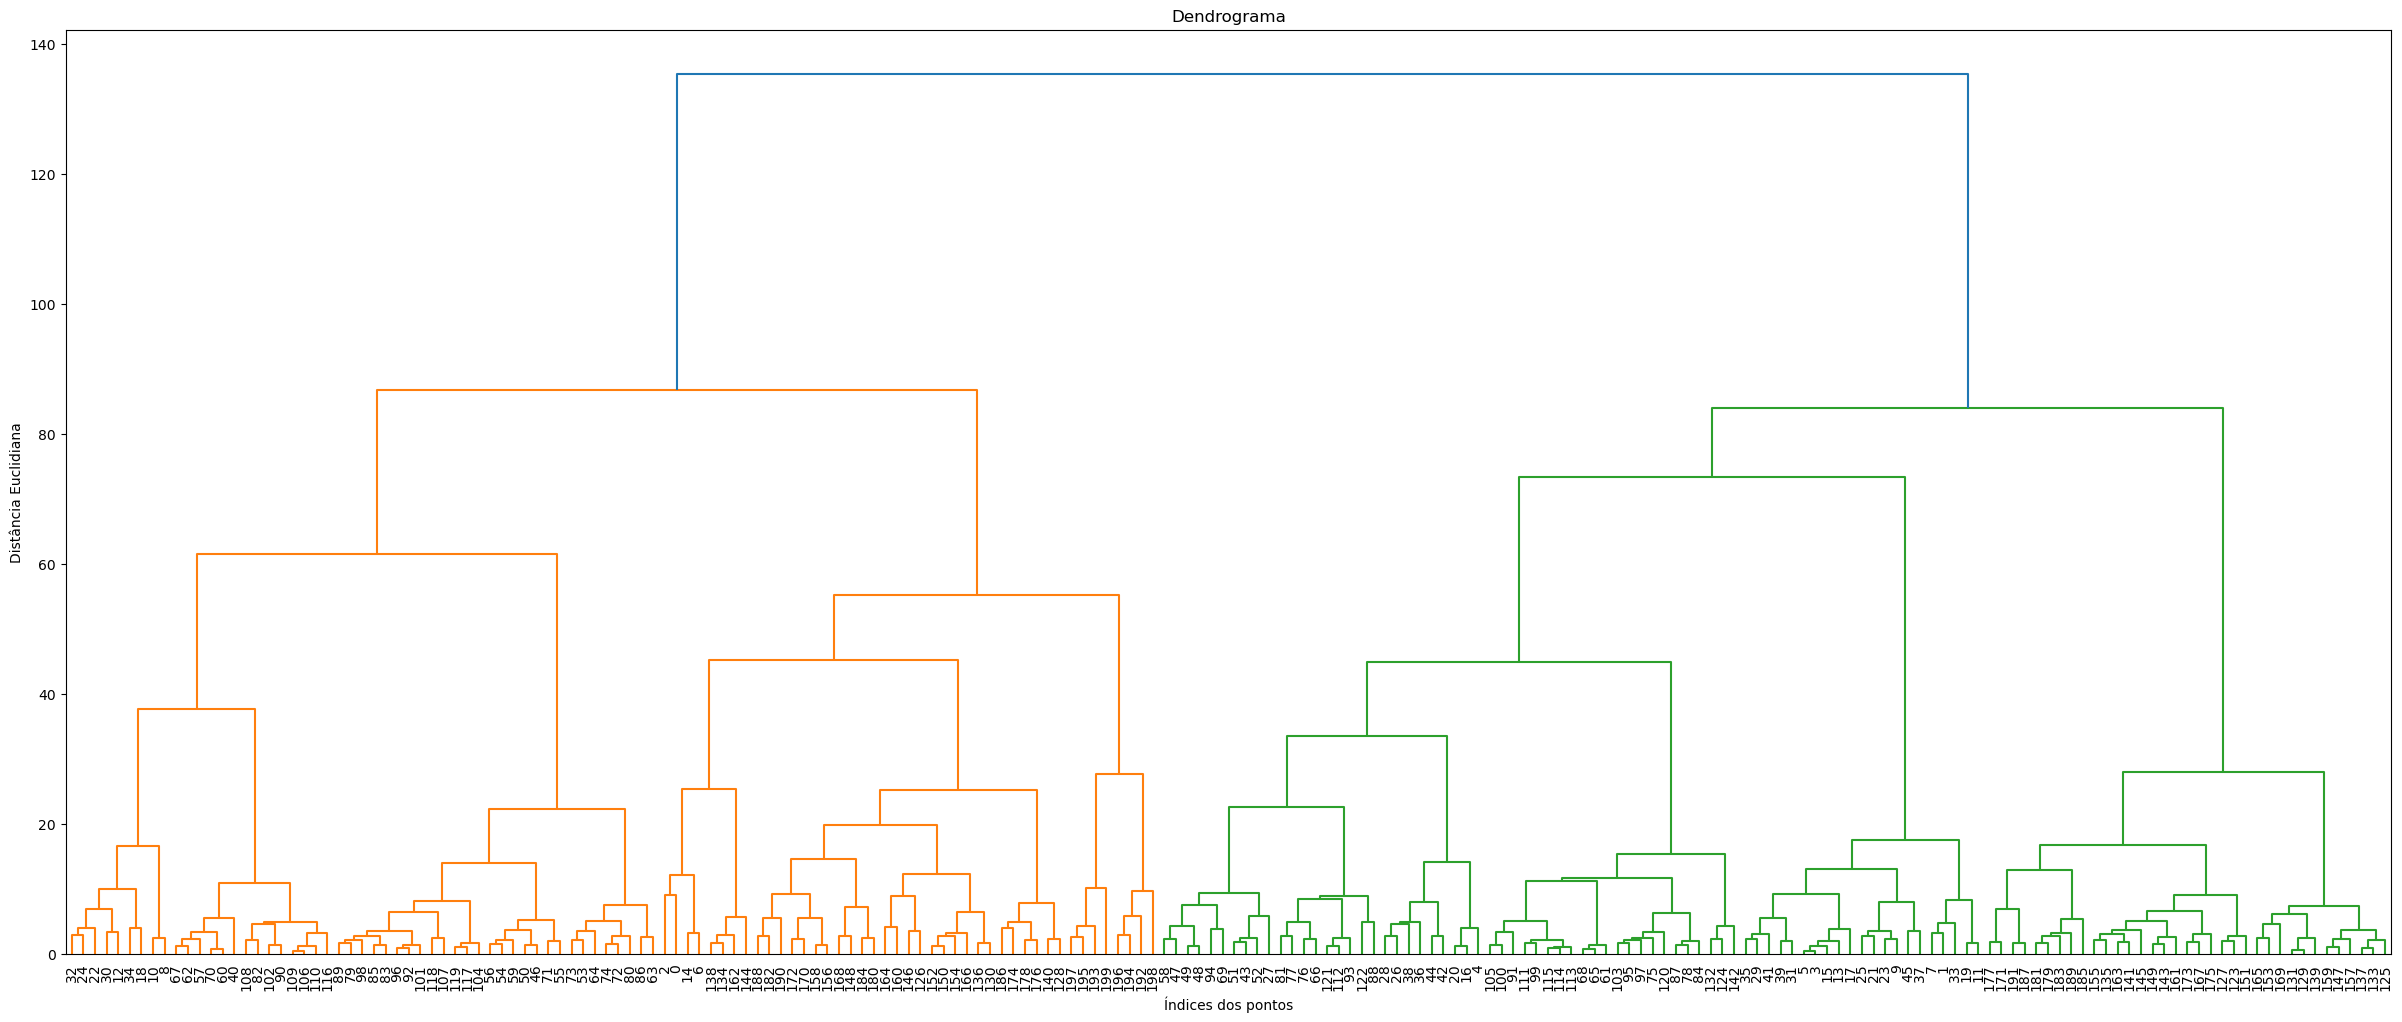

In [22]:
# Construindo um dendrograma que mostra os pontos agrupados hierarquicamente
import warnings
warnings.filterwarnings("ignore")
den = sch.linkage(df_dist,method='ward')

plt.figure(figsize=(30,12))
dendrogram(den,labels=db2_scale.index, orientation='top',distance_sort='descending', leaf_font_size=10)
plt.title("Dendrograma")
plt.xlabel("Índices dos pontos")
plt.ylabel("Distância Euclidiana")
plt.show()

#### A construção de um dendrograma é uma técnica comum na análise de dados para agrupar e visualizar a estrutura de clusters hierárquicos. Os clusters são representados como ramos e a altura em que você corta o dendrograma determina o número de clusters que você obtém. Nesse visualização aparentemente o número ideal entre 4 ou 5 clusters.

------

### Validando o número ideal de cluster com o método do 'Cotovelo'

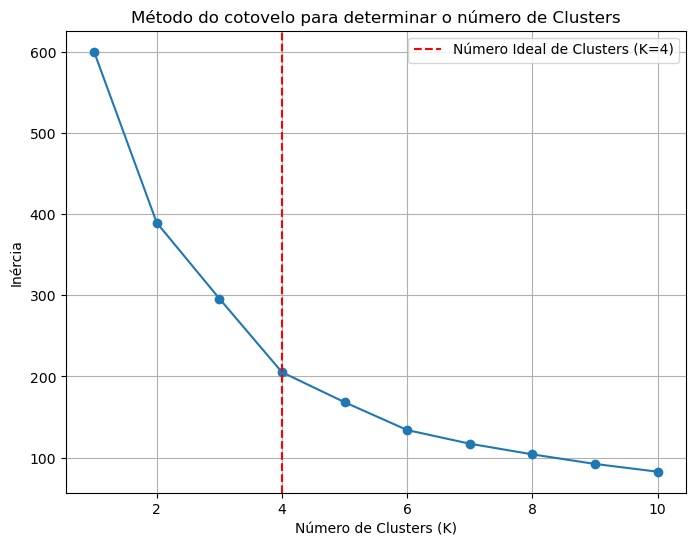

In [23]:
# Método do cotovelo para encontrar o numero ideal de clusters
inertia_values = []
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(db2_scale)
    inertia_values.append(kmeans.inertia_)

kneedle = KneeLocator(k_values, inertia_values, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do cotovelo para determinar o número de Clusters')
plt.grid(True)

plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Número Ideal de Clusters (K={optimal_k})')
plt.legend()
plt.show()



#### Após a utilização do método de cotovelo, a recomendação estátistica é de 4 clusters
------

### Utilizando Kmeans para realizar a clusterização

In [24]:
# Definindo o numero de cluster no Kmeans
Kmeans = KMeans(n_clusters=4, random_state=123)
Kmeans.fit(db2_scale)
db['Cluster'] = Kmeans.labels_ 
db.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,2
4,Female,23,16,77,2
5,Female,31,17,40,2
6,Female,22,17,76,2
7,Female,35,18,6,1
8,Female,23,18,94,2
9,Male,64,19,3,1


#### Após a clusterização, foi adicionada uma coluna no dataframe para mostrar qual cluster aquele Cliente pertence.
-----

### Análise de Clusters

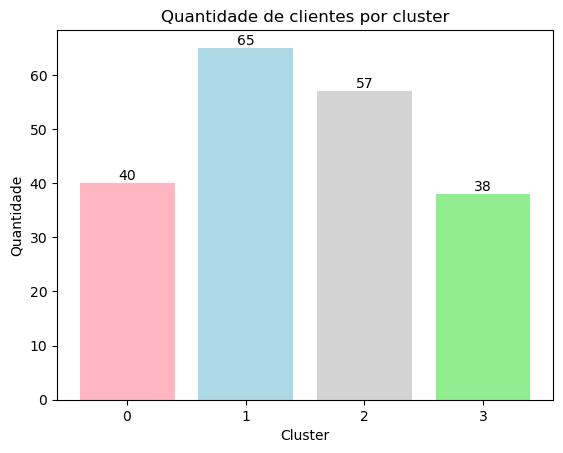

In [25]:
# Quantidade de pessoas em cada gênero 
cluster = db["Cluster"].value_counts()

plt.bar(cluster.index,cluster.values, color=["lightblue",'lightgray',"lightpink","lightgreen"])
plt.xlabel("Cluster")
plt.ylabel("Quantidade")
plt.title("Quantidade de clientes por cluster")
plt.xticks([0, 1, 2, 3])

for x, y in zip(cluster.index, cluster.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.show()



#### Essa segmentação de clientes pode ser usada pelo shopping center para desenvolver estratégias de marketing direcionadas a cada grupo. 
-----

### Os dados apresentados sugerem que os clientes do shopping center são um grupo diversificado. O shopping center pode usar essas informações para desenvolver estratégias de marketing direcionadas a cada grupo de clientes.

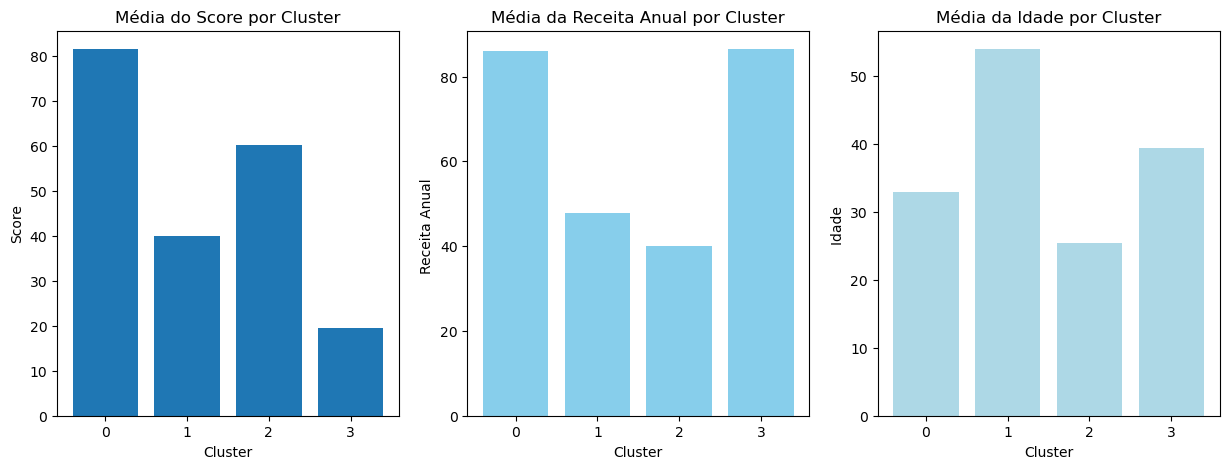

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        32.875000           86.100000               81.525000
1        53.984615           47.707692               39.969231
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947


In [26]:
mean_score_by_cluster = pd.DataFrame(db.groupby('Cluster')['Spending Score (1-100)'].mean())
mean_income_by_cluster = pd.DataFrame(db.groupby('Cluster')['Annual Income (k$)'].mean())
mean_age_by_cluster = pd.DataFrame(db.groupby('Cluster')['Age'].mean())


fig, axes = plt.subplots(1,3, figsize=(15, 5))
axes[0].bar(mean_score_by_cluster.index,mean_score_by_cluster["Spending Score (1-100)"])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Score')
axes[0].set_title('Média do Score por Cluster')

axes[1].bar(mean_income_by_cluster.index,mean_income_by_cluster["Annual Income (k$)"],color='skyblue')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Receita Anual ')
axes[1].set_title('Média da Receita Anual por Cluster')

axes[2].bar(mean_age_by_cluster.index,mean_age_by_cluster["Age"],color='lightblue')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Idade ')
axes[2].set_title('Média da Idade por Cluster')
plt.show()

describe_cluster = db.groupby("Cluster")["Age","Annual Income (k$)","Spending Score (1-100)"].mean()
print(describe_cluster)



### Com base nas informações fornecidas, os quatro clusters podem ser interpretados da seguinte forma:

 - **Cluster 0**: Clientes jovens e bem-sucedidos que estão satisfeitos com o shopping center porque encontram nele produtos e serviços que atendam às suas necessidades e expectativas. *(São clientes com score alto, média de 81 pontos, com receita anual média de 86 mil e são pessoas jovens com idade média de 32 anos.)*
 
---
 
 - **Cluster 1**: Clientes mais velhos e de baixa renda que estão insatisfeitos com o shopping center porque não encontram nele produtos e serviços que sejam acessíveis ou que atendam às suas necessidades. *(São clientes com score médio de 39 pontos, com receita anual média de 47 mil e são pessoas mais velhas com idade média de 53 anos.)*
 
 ---
 
 - **Cluster 2**: Clientes jovens e de baixa renda que estão satisfeitos com o shopping center porque encontram nele produtos e serviços que sejam acessíveis. *(São clientes com score médio de 60 pontos, com receita anual média de 40 mil e são pessoas mais jovens com idade média de 25 anos.)*
 
 ---
 
 - **Cluster 3**: Clientes de meia-idade e de alta renda que estão insatisfeitos com o shopping center porque não encontram nele produtos e serviços que sejam exclusivos ou que atendam às suas expectativas. *(São clientes com score baixo, média de 19 pontos, com receita anual média de 86 mil e são pessoas com idade média de 39 anos.)*
 
 ---

### Distribuição dos clusters

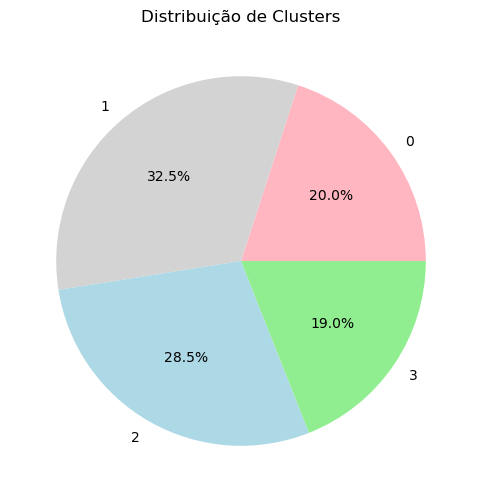

In [27]:
count_id = db.groupby("Cluster").size().reset_index(name="contagem")
total = len(db)
labels = count_id["Cluster"]

# Porcentagens de cada cluster
percent = count_id["contagem"] / total * 100
# Cores para os slices do gráfico de pizza
colors = ['lightpink', 'lightgray', 'lightblue', 'lightgreen']

plt.figure(figsize=(6, 6)) 
plt.pie(percent, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribuição de Clusters')

plt.show()

## Conclusão:

#### Com base nas informações fornecidas, podemos concluir que o shopping center está atraindo um público diversificado, mas que ainda há oportunidades de melhoria para aumentar as vendas e atrair novos clientes.

### Recomendações:

**Para melhorar as vendas e atrair novos clientes**:

   - Atrair clientes de todas as faixas etárias e de rendas diferentes, oferecendo uma variedade de produtos e serviços que atendam às necessidades de todos os clientes.
 - Melhorar a experiência do cliente, oferecendo um ambiente agradável e atendimento de qualidade.
 - Promover campanhas de marketing direcionadas a diferentes públicos-alvo.

---

**Para clientes jovens e bem-sucedidos (Cluster 0)**:

 - Oferecer produtos e serviços exclusivos e de alta qualidade.
 - Oferecer atendimento personalizado e de primeira classe.
 
---

**Para clientes mais velhos e de baixa renda (Cluster 1)**:

 - Oferecer produtos e serviços acessíveis e de qualidade.
 - Oferecer promoções e descontos especiais.
 
----

**Para clientes jovens e de baixa renda (Cluster 2)**:

 - Oferecer produtos e serviços acessíveis e de qualidade.
 - Oferecer programas de fidelidade para recompensar os clientes.

----

**Para clientes de meia-idade e de alta renda (Cluster 3)**:

 - Oferecer produtos e serviços exclusivos e de alta qualidade.
 - Oferecer eventos e atividades especiais.
 
---

*Essas recomendações são apenas um ponto de partida. Para implementar essas recomendações de forma eficaz, o shopping center deve realizar pesquisas de mercado para entender melhor as necessidades e expectativas dos seus clientes. Seria muito importante lançar pesquisas para entender melhor os clientes. As pesquisas podem fornecer informações valiosas sobre as necessidades, expectativas e comportamentos dos clientes. Essas informações podem ser usadas para melhorar a experiência do cliente e aumentar as vendas.*

 - *Pesquisa de satisfação do cliente: Essa pesquisa é usada para avaliar a satisfação dos clientes com o shopping center. As perguntas podem incluir questões sobre a qualidade dos produtos e serviços, o atendimento ao cliente e o ambiente do shopping center.*

 - *Pesquisa de mercado: Essa pesquisa é usada para entender as necessidades e expectativas dos clientes em potencial. As perguntas podem incluir questões sobre os produtos e serviços que os clientes procuram, os preços que eles estão dispostos a pagar e os locais que eles preferem para fazer compras.*
 

 - *Pesquisa de comportamento do cliente: Essa pesquisa é usada para entender como os clientes usam o shopping center. As perguntas podem incluir questões sobre os produtos e serviços que eles compram, as lojas que eles visitam e o tempo que eles passam no shopping center.*